 **SUPERVISED LEARING**

**Types:**
     
     1.Regression
     2.Classification

**Regression**



        1.simple linear regression
        2.multiple linear regression
        3.polynomial regression

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

area = np.random.randint(300,4000,100)
bedrooms = np.random.randint(1,6,100)
age = np.random.randint(1,30,100)
price = (area*0.6) + (bedrooms*4) + (age*0.2)+np.random.normal(0,20,100)

Data = pd.DataFrame({
    'Area':area,
    'Bedrooms':bedrooms,
    'Age':age,
    'Price':price.round(2)
    })


Data.to_csv('/content/House_price.csv',index=False)

In [ ]:
df=Data
df.head(5)

,Area,Bedrooms,Age,Price
0,3474,4,20,2130.39
1,3807,1,17,2274.26
2,1160,5,17,731.75
3,1594,5,26,1005.94
4,1430,2,20,874.53


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[["Area","Bedrooms","Age"]]
Y=df["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
House = [[1430,2,20]]
result = model.predict(House)
print("Pridictrd Price : ",result)

Pridictrd Price :  [872.04731977]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
print("MAE : ",mean_absolute_error(Y_test,Y_pred))
print("MSE : ",mean_squared_error(Y_test,Y_pred))
print("RMSE: ",root_mean_squared_error(Y_test,Y_pred))
print("R2 SCORE: ",r2_score(Y_test,Y_pred))

MAE :  16.891008434145846
MSE :  377.61864752519966
RMSE:  19.432412293001597
R2 SCORE:  0.9992629711643117


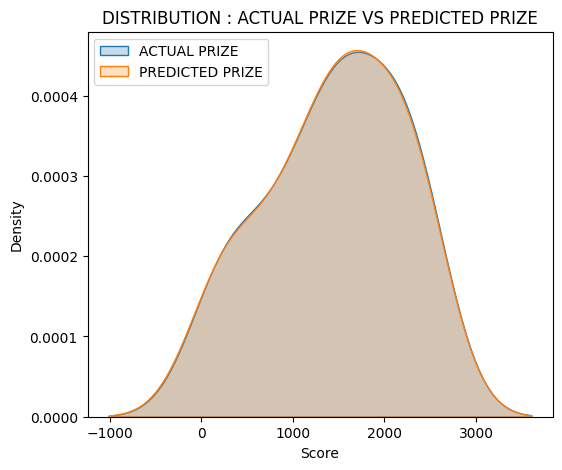

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.kdeplot(Y_test, label="ACTUAL PRIZE",fill=True)
sns.kdeplot(Y_pred, label="PREDICTED PRIZE", fill=True)
plt.title("DISTRIBUTION : ACTUAL PRIZE VS PREDICTED PRIZE")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

/tmp/ipython-input-3137418074.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


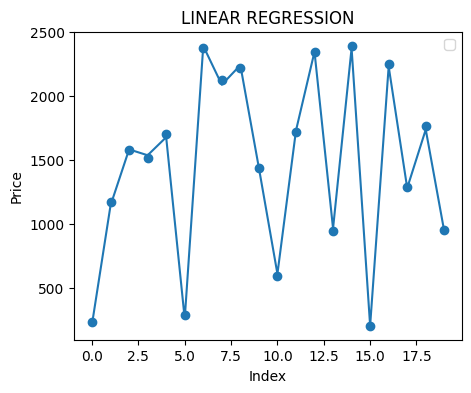

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter (range(len(Y_test)),Y_test.values)
plt.plot(range(len(Y_pred)),Y_pred)
plt.title("LINEAR REGRESSION")
plt.xlabel("Index")
plt.ylabel("Price")
plt.legend()
plt.show()

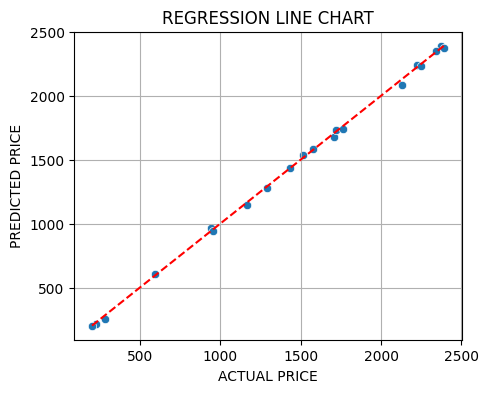

In [ ]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=Y_test,y=Y_pred)
plt.plot([Y_test.min(),Y_pred.max()],[Y_test.min(),Y_pred.max()],'r--')
plt.title("REGRESSION LINE CHART")
plt.xlabel("ACTUAL PRICE")
plt.ylabel("PREDICTED PRICE")
plt.grid(True)
plt.show()

**SIMPLE LINEAR REGRESSION**

In [ ]:
df2=Data
df2

,Area,Bedrooms,Age,Price
0,3474,4,20,2130.39
1,3807,1,17,2274.26
2,1160,5,17,731.75
3,1594,5,26,1005.94
4,1430,2,20,874.53
...,...,...,...,...
95,1879,3,5,1134.04
96,461,2,27,296.36
97,501,4,23,288.96
98,2281,3,9,1401.31


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X=df[["Age"]]    # df.drop("price",axis=1)   LINEAR REGRESSION - MULTIPLE
Y=df["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
print("R2 SCORE : ",r2_score(Y_test,Y_pred))

R2 SCORE :  -0.03651317979794455


/tmp/ipython-input-2905932919.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(Y_test, label="ACTUAL PRIZE", shade=True,alpha=1)


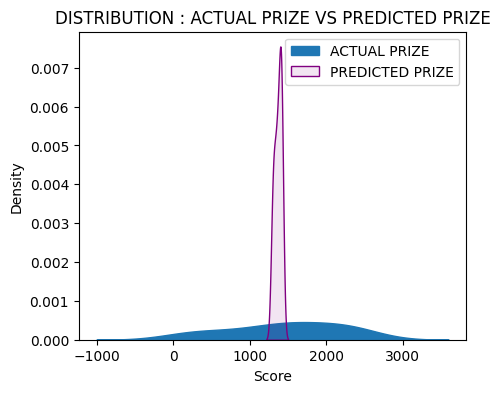

In [ ]:
plt.figure(figsize=(5,4))
sns.kdeplot(Y_test, label="ACTUAL PRIZE", shade=True,alpha=1)
sns.kdeplot(Y_pred, label="PREDICTED PRIZE", fill=True, color="purple",alpha=0.1)
plt.title("DISTRIBUTION : ACTUAL PRIZE VS PREDICTED PRIZE")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
df2[['Area','Price']].head()

,Area,Price
0,3474,2130.39
1,3807,2274.26
2,1160,731.75
3,1594,1005.94
4,1430,874.53


In [ ]:
actual = [[2138]]

result = model.predict(actual)

print("predicted price : ",result)

predicted price :  [-9631.95264382]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


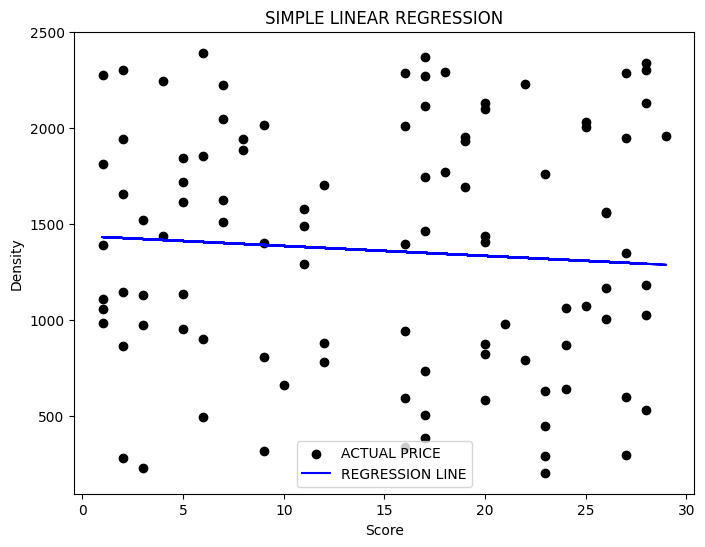

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y,color="black",label="ACTUAL PRICE")
plt.plot(X,model.predict(X),color="blue",label="REGRESSION LINE")
plt.title("SIMPLE LINEAR REGRESSION")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.show()

**POLYNOMIAL REGRESSION**

In [ ]:
df3=Data
df3.head()

,Area,Bedrooms,Age,Price
0,3474,4,20,2130.39
1,3807,1,17,2274.26
2,1160,5,17,731.75
3,1594,5,26,1005.94
4,1430,2,20,874.53


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X=df[["Age"]]    # df.drop("price",axis=1)   LINEAR REGRESSION - MULTIPLE
Y=df["Price"]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()

model.fit(X_poly,Y)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_poly)

In [ ]:
print("R2 SCORE : ",r2_score(Y,Y_pred))

R2 SCORE :  0.0015174865873596177


In [ ]:
area_range = np.linspace(X.min(),X.max(),100).reshape(-1,1)
area_range_poly = poly.transform(area_range)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


/tmp/ipython-input-3712932934.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


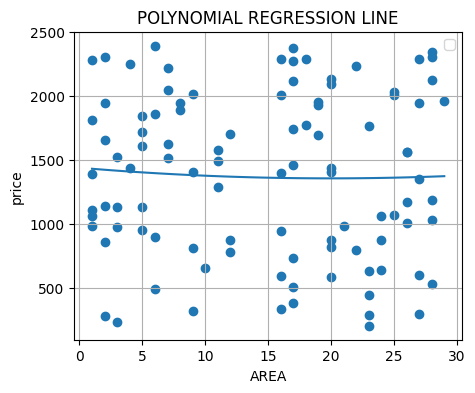

In [ ]:
curve = model.predict(area_range_poly)

plt.figure(figsize=(5,4))
plt.scatter(X,Y)
plt.plot(area_range,curve)

plt.xlabel("AREA")
plt.ylabel("price")
plt.title("POLYNOMIAL REGRESSION LINE")
plt.legend()
plt.grid(True)
plt.show()